<title>Author Attribution</title>

<center><h1>Author Attribution</h1></center>

In [93]:
!pip install wordcloud
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [94]:
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import glob, csv
import re
import string
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import time
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from nltk.corpus.reader.wordnet import VERB, NOUN, ADJ, ADV
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from string import punctuation
from string import digits
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

<h1>Data Preprocessing</h1>

In [95]:
authors = os.listdir('./data/C50train')
print(authors)
print(len(authors))

['AaronPressman', 'AlanCrosby', 'AlexanderSmith', 'BenjaminKangLim', 'BernardHickey', 'BradDorfman', 'DarrenSchuettler', 'DavidLawder', 'EdnaFernandes', 'EricAuchard', 'FumikoFujisaki', 'GrahamEarnshaw', 'HeatherScoffield', 'JaneMacartney', 'JanLopatka', 'JimGilchrist', 'JoeOrtiz', 'JohnMastrini', 'JonathanBirt', 'JoWinterbottom', 'KarlPenhaul', 'KeithWeir', 'KevinDrawbaugh', 'KevinMorrison', 'KirstinRidley', 'KouroshKarimkhany', 'LydiaZajc', "LynneO'Donnell", 'LynnleyBrowning', 'MarcelMichelson', 'MarkBendeich', 'MartinWolk', 'MatthewBunce', 'MichaelConnor', 'MureDickie', 'NickLouth', 'PatriciaCommins', 'PeterHumphrey', 'PierreTran', 'RobinSidel', 'RogerFillion', 'SamuelPerry', 'SarahDavison', 'ScottHillis', 'SimonCowell', 'TanEeLyn', 'TheresePoletti', 'TimFarrand', 'ToddNissen', 'WilliamKazer']
50


In [96]:
def dataframe_creation(path):
    labels = []
    docs = []
    #path='./data/C50train/'
    for r, dirs, files in os.walk(path):
         for file in files:
               # print(file)
                with open(os.path.join(r, file), "r") as f:
                    author_text = f.read()
                    author_sentences = author_text.replace('.\n','')
                    docs.append(author_sentences)
                    labels.append(r.replace(path,''))

                    #author_sentences = author_text.split(".\n")
                    #for sentence in author_sentences:
                    #        sentence = sentence.replace('\n', '')
                    #        if sentence.__len__() > 0 and sentence.count(' ') > 1:
                    #            docs.append(sentence)
                    #            labels.append(r.replace(path,''))
                    
    data_dict = dict([('text', docs), ('author', labels)])
    df = pd.DataFrame(data_dict)
    le = preprocessing.LabelEncoder()
    df['author_label'] = le.fit_transform(df.author)
    df['id'] = df.index
    
    return df
                             
            

In [97]:
#df_trainset=dataframe_creation('./data/C50train/')


In [98]:
#df_testset=dataframe_creation('./data/C50test/')

In [99]:
#print(df_trainset)

In [100]:
eng_stopwords = set(stopwords.words("english"))
#df_trainset["num_words"] = df_trainset["text"].apply(lambda x: len(str(x).split()))
#df_trainset["num_unique_words"] = df_trainset["text"].apply(lambda x: len(set(str(x).split())))
#df_trainset["num_chars"] = df_trainset["text"].apply(lambda x: len(str(x)))
#df_trainset["num_stopwords"] = df_trainset["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#df_trainset["num_punctuations"] =df_trainset['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
#df_trainset["mean_word_len"] = df_trainset["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#df_trainset["num_words_upper"] = df_trainset["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))


In [101]:
stop_words = stopwords.words('english')
eng_stop_words=list(ENGLISH_STOP_WORDS)
my_stop_words=['fax']
eng_stop_words.extend(my_stop_words)
stopwords_dict = Counter(stop_words)
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def stop_word_rem_and_lemmatization(text):
    lemm_text=[]
    #stop_words_cleaned_text=[word for word in text.split() if word not in stopwords_dict]
    
    
    for word,tag in pos_tag(text.split()):
        lemm_text.append(lemmatizer.lemmatize(word, get_wordnet_pos(tag)))
    #lemm_text=[word for word in lemm_text if word not in eng_stop_words]
    return " ".join(lemm_text).lower()

    

In [102]:
remove_digits = str.maketrans('', '', digits)

def preprocessData(text):
    #Text lemmatization and stop words removal
    sentence=stop_word_rem_and_lemmatization(text)
    #print(sentence)
    
    
    #remove dots between abbreviations, U.S.A--> USA
    sentence=re.sub('\.(?!(\S[^. ])|\d)', '', sentence)
    
    #pad punctuations with spaces
    sentence = re.sub('([.,!;"?\'~#()&/{}_<>:|\-\*$])', r' \1 ', sentence)
         
    #remove all characters less than or equal to two characters
    #sentence=re.sub(r'\b\w{1,2}\b', '', sentence)
    
    #remove all digits
    #sentence = ''.join([i for i in sentence if not i.isdigit()])
    sentence = sentence.translate(remove_digits)
    
    for ch in punctuation+'*()[]^@+=_/\$%-.,':
        sentence = sentence.replace(ch,'')
    
    #remove multiple whitespaces
    sentence= re.sub(' +', ' ', sentence)
    
    #sentence=re.sub('[^A-Za-z0-9\s]+', '', sentence)
            
    return sentence
            

In [103]:
#df_trainset["preprocessed_text"] = df_trainset["text"].apply(lambda x: preprocessData(str(x)))
#df_testset["preprocessed_text"] = df_testset["text"].apply(lambda x: preprocessData(str(x)))


Once the preprocessing is done store the results in a csv file, to avoid repetition of this step each time. Data will be loaded from the CSV file for subsequent runs

In [104]:
#df_trainset.to_csv('preprocessed_trainset.csv', encoding='utf-8', index=False)
#df_testset.to_csv('preprocessed_testset.csv', encoding='utf-8', index=False)

In [105]:
df_trainset = pd.read_csv('preprocessed_trainset.csv')
df_testset= pd.read_csv('preprocessed_testset.csv')

In [106]:
df_trainset.head()

,text,author,author_label,id,preprocessed_text
0,The Internet may be overflowing with new techn...,AaronPressman,0,0,the internet may be overflow with new technolo...
1,The U.S. Postal Service announced Wednesday a ...,AaronPressman,0,1,the us postal service announce wednesday a pla...
2,Elementary school students with access to the ...,AaronPressman,0,2,elementary school student with access to the i...
3,An influential Internet organisation has backe...,AaronPressman,0,3,an influential internet organisation have back...
4,An influential Internet organisation has backe...,AaronPressman,0,4,an influential internet organisation have back...


In [107]:
def add_feature(X, feature_to_add):
    '''
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    '''
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

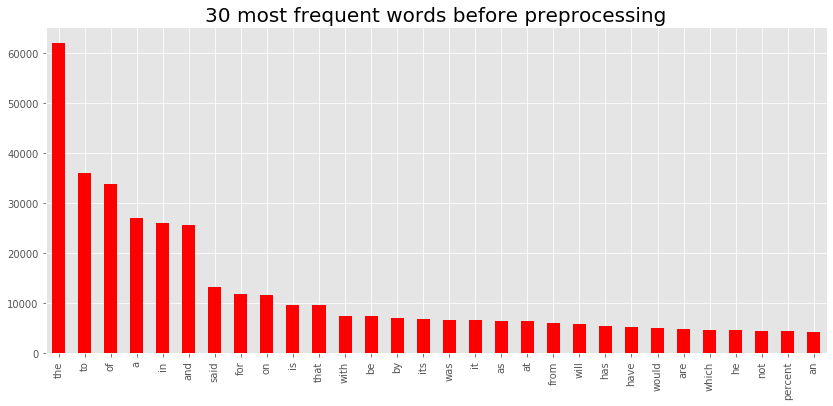

In [108]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(df_trainset["text"]).split()).value_counts()[:30]
freq.plot(kind="bar", color = "red")
plt.title("30 most frequent words before preprocessing",size=20)
plt.show()

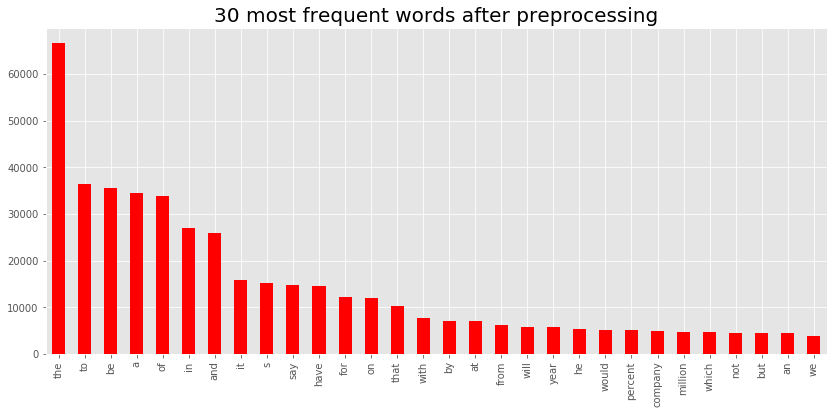

In [109]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(df_trainset["preprocessed_text"]).split()).value_counts()[:30]
freq.plot(kind="bar", color = "red")
plt.title("30 most frequent words after preprocessing",size=20)
plt.show()

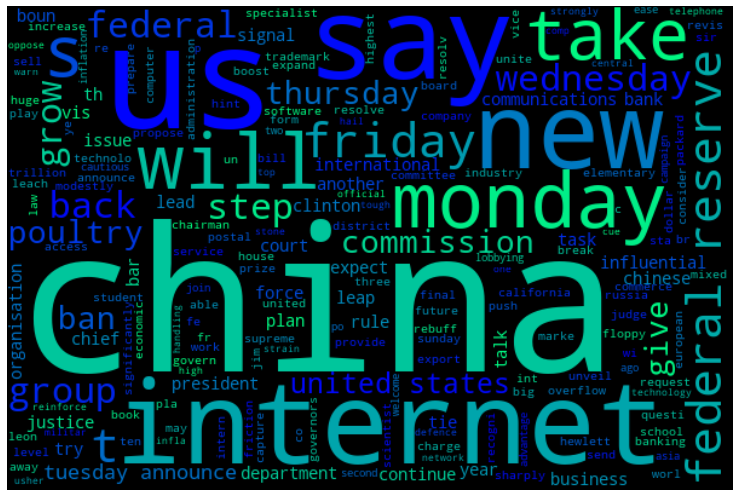

In [110]:
cloud=WordCloud(colormap="winter",width=600,height=400).generate(str(df_trainset["preprocessed_text"]))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.show()

<h1>Feature Selection</h1>


<h3>1. Bag of Words</h3>

The Bag of words (BoW) model captures the frequencies of the word occurrences in a text corpus.
Bag of words is not concerned about the order in which words appear in the text; instead, it only cares about which words appear in the text

In [159]:
vectorizer_cnt = CountVectorizer(token_pattern=r'\b\w+\b',ngram_range=(1,3),max_features=10000)
train_matrix_cnt = vectorizer_cnt.fit_transform(df_trainset['preprocessed_text'])
test_matrix_cnt = vectorizer_cnt.transform(df_testset['preprocessed_text'])
print(train_matrix_cnt.shape)

(2500, 10000)


<h3>2. TF-IDF</h3>

TF-IDF stands for Term Frequency, Inverse Document Frequency.TF-IDF measures how important a particular word is with respect to a document and the entire corpus.
Term frequency is the measure of the counts of each word in a document out of all the words in the same document.<br/>
<b>TF(w) = (number of times word w appears in a document) / (total number of words in the document)</b><br/>

IDF is a measure of the importance of a word, taking into consideration the frequency of the word throughout the corpus.
It measures how important a word is for the corpus.<br/>
<b>IDF(w) = log(total number of documents / number of documents with w in it)</b><br/>

Finally, to calculate TF-IDF, we multiply these two factors – TF and IDF.<br/>
<b>TF-IDF(w) = TF(w) x IDF(w)</b>

In [112]:
vectorizer_tf=TfidfVectorizer(norm = 'l2',min_df = 0, use_idf = True, smooth_idf = False, sublinear_tf = True,
                             ngram_range=(1,3), max_features = 15000,token_pattern=r'\b\w+\b',analyzer='word')

train_matrix_tf_idf = vectorizer_tf.fit_transform(df_trainset['preprocessed_text'])
test_matrix_tf_idf = vectorizer_tf.transform(df_testset["preprocessed_text"])

print((train_matrix_tf_idf.shape))

(2500, 15000)


In [113]:
#train_matrix_tf_idf = add_feature(train_matrix_tf_idf, [X_train_punc, X_train_num_words,X_train_stop_words,X_train_mean_length,X_train_upper])
#test_matrix_tf_idf = add_feature(test_matrix_tf_idf, [X_test_punc, X_test_num_words,X_test_stop_words,X_test_mean_length,X_test_upper])


<h3>3. Chi - Square</h3>

The chi-squared statistic measures the lack of independence between a feature (a word in the author's text) and class (author).
Since what chi-square measures is lack of independence between a feature and class, if a feature has high chi-squared score compared to other features, it means that the feature is useful to predict the class.
Let us print the top 20 features that are useful in predicting the class

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0, '$\\chi^2$')

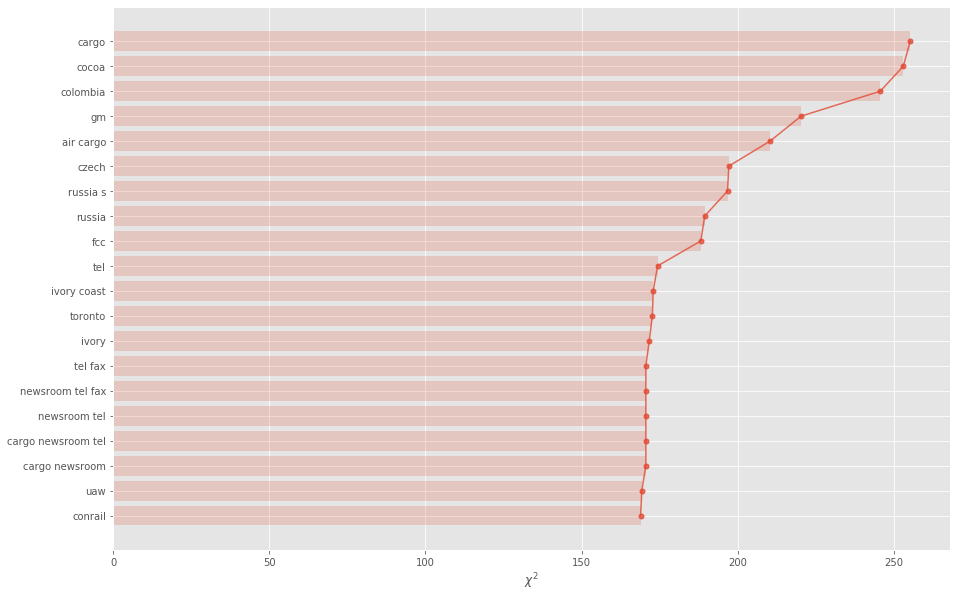

In [114]:

from matplotlib import pyplot as plt
chi2score = chi2(train_matrix_tf_idf, df_trainset['author_label'])[0]

plt.figure(figsize=(15,10))
wscores = zip(vectorizer_tf.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

The most useful feature selected by Chi is 'cargo', which occurs 80 times in Jim Glichrist's article. The second best feature is 'cocoao' which occurs over 39 times in Mathew Bunce articles. It looks like Mr. Bunce writes exclusively on ivory coast. Chi quare takes only a vector as an input, hence let us pass the vector obtained from TF-IDF as input to Chi.

In [115]:
#chi2score = chi2(train_matrix, y_train)[0]
ch2 = SelectKBest(chi2, k=10000)
train_matrix_chi2 = ch2.fit_transform(train_matrix_tf_idf,df_trainset['author_label'])
test_matrix_chi2 = ch2.transform(test_matrix_tf_idf)
print(train_matrix_chi2.shape)

(2500, 10000)


In [174]:
results_list=[]
results_list_stylo=[]
def insert_results(classification_dict,name):
    accuracy=np.round(classification_dict['accuracy']*100,2)
    f1_score=np.round(classification_dict['weighted avg']['f1-score']*100,2)
    precision=np.round(classification_dict['weighted avg']['precision']*100,2)
    results_list.append({name:{'Accuracy':accuracy,'F1 score':f1_score,'Precision':precision}})
    
def insert_results_stylo(classification_dict,name):
    accuracy=np.round(classification_dict['accuracy']*100,2)
    f1_score=np.round(classification_dict['weighted avg']['f1-score']*100,2)
    precision=np.round(classification_dict['weighted avg']['precision']*100,2)
    results_list_stylo.append({name:{'Accuracy':accuracy,'F1 score':f1_score,'Precision':precision}})
    
    
    

<h2>Dimensionality Reduction (SVD)</h2>

In [117]:
svd = TruncatedSVD(n_components=2000,random_state=42)
train_matrix_tf_svd=svd.fit_transform(train_matrix_tf_idf)
test_matrix_tf_svd=svd.transform(test_matrix_tf_idf)

In [118]:
X_train_vectorizors=[train_matrix_cnt,train_matrix_tf_idf,train_matrix_chi2,train_matrix_tf_svd]
X_test_vectorizors=[test_matrix_cnt,test_matrix_tf_idf,test_matrix_chi2,test_matrix_tf_svd]
X_labels=['Count Vectorizer','TF-IDF','TF-IDF + CHI2','SVD']
y_train = df_trainset['author_label']
y_test = df_testset['author_label']

<h2>Classification Algorithms</h2>

<h3>KNN Algorithm</h3>

In [119]:

acc_list=[]
prec_list=[]
f1_list=[]
acc_all_model=[]
k=30
cat_names = ['True -ve','False +ve','False -ve','True +ve']

for i in range(4):
    X_train = X_train_vectorizors[i]
    X_test = X_test_vectorizors[i]
    print("----------------------------------------------")
    print("FOR VECTORIZOR "+X_labels[i])

    for m in ['manhattan',
              'euclidean','cosine']:

        classifier = KNeighborsClassifier(n_neighbors=k,algorithm='auto',metric=m) #Using brute-force algorithm for quicker computation.
        classifier.fit(X_train, y_train) #Fitting the built-in sklearn classifier on our training data
        predicted_label = classifier.predict(X_test) #Making the classifier to predict on the previously unseen test data.

        confusion_mat = confusion_matrix(y_test, predicted_label)
        class_report = classification_report(y_test, predicted_label)
        class_report_dict = classification_report(y_test, predicted_label,output_dict=True)
        acc_list.append({m:np.round(class_report_dict['accuracy']*100,2)})
        f1_list.append({m:np.round(class_report_dict['weighted avg']['f1-score']*100,2)})
        prec_list.append({m:np.round(class_report_dict['weighted avg']['precision']*100,2)})
        if(i==2 and m=='cosine'):
            #acc_all_model.append({'knn':np.round(class_report_dict['accuracy']*100,2)})
            insert_results(class_report_dict,'KNN')
        print("\nClassification Report for metric = {} is:\n".format(m))
        print(class_report)
        names=[]
        names.append("KNN")

----------------------------------------------
FOR VECTORIZOR Count Vectorizer


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr


Classification Report for metric = manhattan is:

              precision    recall  f1-score   support

           0       0.54      0.30      0.38        50
           1       0.54      0.44      0.48        50
           2       0.00      0.00      0.00        50
           3       0.17      0.02      0.04        50
           4       0.29      0.04      0.07        50
           5       0.45      0.10      0.16        50
           6       1.00      0.02      0.04        50
           7       0.50      0.04      0.07        50
           8       0.05      0.38      0.09        50
           9       0.26      0.14      0.18        50
          10       1.00      0.02      0.04        50
          11       0.88      0.14      0.24        50
          12       0.32      0.16      0.21        50
          13       1.00      0.04      0.08        50
          14       0.00      0.00      0.00        50
          15       0.05      1.00      0.10        50
          16       1.00      0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr


Classification Report for metric = manhattan is:

              precision    recall  f1-score   support

           0       0.67      0.56      0.61        50
           1       1.00      0.32      0.48        50
           2       0.00      0.00      0.00        50
           3       0.70      0.14      0.23        50
           4       0.86      0.12      0.21        50
           5       0.89      0.16      0.27        50
           6       1.00      0.06      0.11        50
           7       0.80      0.08      0.15        50
           8       0.03      0.22      0.05        50
           9       0.80      0.16      0.27        50
          10       1.00      0.08      0.15        50
          11       1.00      0.14      0.25        50
          12       0.52      0.26      0.35        50
          13       0.67      0.04      0.08        50
          14       0.00      0.00      0.00        50
          15       0.03      1.00      0.06        50
          16       1.00      0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr


Classification Report for metric = manhattan is:

              precision    recall  f1-score   support

           0       0.53      0.80      0.63        50
           1       0.45      0.80      0.58        50
           2       0.00      0.00      0.00        50
           3       0.75      0.18      0.29        50
           4       0.55      0.68      0.61        50
           5       0.59      0.40      0.48        50
           6       1.00      0.08      0.15        50
           7       0.50      0.10      0.17        50
           8       0.05      0.90      0.09        50
           9       0.48      0.26      0.34        50
          10       1.00      0.28      0.44        50
          11       0.92      0.44      0.59        50
          12       0.18      0.46      0.26        50
          13       0.40      0.20      0.27        50
          14       0.17      0.02      0.04        50
          15       0.22      1.00      0.36        50
          16       0.95      0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr


Classification Report for metric = manhattan is:

              precision    recall  f1-score   support

           0       0.04      0.94      0.07        50
           1       0.10      0.36      0.15        50
           2       0.00      0.00      0.00        50
           3       0.05      0.40      0.09        50
           4       0.27      0.30      0.29        50
           5       1.00      0.02      0.04        50
           6       0.00      0.00      0.00        50
           7       0.67      0.04      0.08        50
           8       0.00      0.00      0.00        50
           9       0.00      0.00      0.00        50
          10       0.43      0.20      0.27        50
          11       0.00      0.00      0.00        50
          12       0.47      0.18      0.26        50
          13       0.00      0.00      0.00        50
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00        50
          16       0.33      0

<h5>Comparision of accuracy of knn models for different distance measures and Vectorizors</h5>

In [120]:
df_acc=pd.DataFrame(acc_list)
df_acc = df_acc.apply(lambda x: pd.Series(x.dropna().values))
df_acc.index=X_labels
df_acc.style.highlight_max(color = 'lightblue', axis = 0)

,cosine,euclidean,manhattan
Count Vectorizer,41.92,35.44,13.84
TF-IDF,63.16,63.16,15.44
TF-IDF + CHI2,61.6,61.08,34.24
SVD,62.8,62.24,11.48


<h5>Comparision of precision of knn models for different distance measures and Vectorizors</h5>

In [121]:
df_prec=pd.DataFrame(prec_list)
df_prec = df_prec.apply(lambda x: pd.Series(x.dropna().values))
df_prec.index=X_labels
df_prec.style.highlight_max(color = 'lightblue', axis = 0)

,cosine,euclidean,manhattan
Count Vectorizer,54.34,52.85,50.44
TF-IDF,64.98,64.98,50.89
TF-IDF + CHI2,62.7,64.2,64.57
SVD,64.28,64.26,27.87


<h5>Comparision of F1-score of knn models for different distance measures and Vectorizors</h5>

In [122]:
df_prec=pd.DataFrame(f1_list)
df_prec = df_prec.apply(lambda x: pd.Series(x.dropna().values))
df_prec.index=X_labels
df_prec.style.highlight_max(color = 'lightblue', axis = 0)

,cosine,euclidean,manhattan
Count Vectorizer,42.67,36.21,13.99
TF-IDF,62.08,62.08,17.96
TF-IDF + CHI2,60.66,60.51,36.45
SVD,61.73,61.13,9.04


From the results above it is clear that TF-IDF and SVD give higher F1-scores compared to other methods. Hence to speed up the evaluation lets reset the vector list to contain only these two

In [123]:
X_train_vectorizors=[train_matrix_tf_idf,train_matrix_tf_svd]
X_test_vectorizors=[test_matrix_tf_idf,test_matrix_tf_svd]
X_labels=['TF-IDF','SVD']
y_train = df_trainset['author_label']
y_test = df_testset['author_label']

<h2>Logistic Regression</h2>

In [124]:
#from sklearn.model_selection import GridSearchCV
#LR = LogisticRegression()
#LRparam_grid = {
#    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#    'penalty': ['l2'],
#    'max_iter': list(range(100,200,100)),
#    'solver': ['newton-cg', 'lbfgs', 'saga']
#}
#LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)
#LR_search.fit(train_matrix_tf_idf , y_train)
#LR_search.best_params_
## summarize
#print('Mean Accuracy: %.3f' % LR_search.best_score_)
#print('Config: %s' % LR_search.best_params_)

The optimal parameters for Logistic regression has been determined using GridSearchCV on the paramers penalty,C,max_iter and solver.
C=1000,max_iter=100, penalty='l2', solver='newton-cg' yielded the best accuracy and hence it will be used.

In [163]:
for i in range(2):
    X_train = X_train_vectorizors[i]
    X_test = X_test_vectorizors[i]
    lr = LogisticRegression(C=1000,max_iter=100, penalty='l2', solver='newton-cg')
    #scores_lr_non_stylo = lr.fit(X_train,y_train).score(X_test,y_test)
    lr.fit(X_train,y_train)
    predictions_lr = lr.predict(X_test)
    print(classification_report(y_test, predictions_lr))
    class_report_dict_lr=classification_report(y_test, predictions_lr,output_dict=True)
    insert_results(class_report_dict_lr,'Logistic Regression + '+X_labels[i])

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        50
           1       0.88      0.56      0.68        50
           2       0.58      0.42      0.49        50
           3       0.53      0.40      0.45        50
           4       0.91      0.86      0.89        50
           5       0.66      0.96      0.78        50
           6       0.37      0.28      0.32        50
           7       0.70      0.32      0.44        50
           8       0.91      0.62      0.74        50
           9       0.72      0.56      0.63        50
          10       1.00      1.00      1.00        50
          11       0.77      0.94      0.85        50
          12       0.36      0.42      0.39        50
          13       0.60      0.56      0.58        50
          14       0.32      0.36      0.34        50
          15       0.96      1.00      0.98        50
          16       0.93      0.84      0.88        50
          17       0.59    

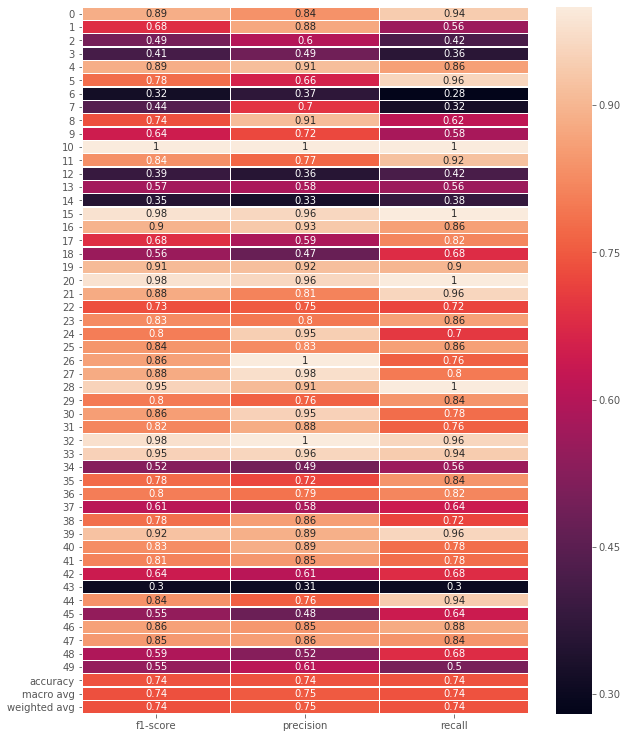

In [164]:
class_report_dict_lr = classification_report(y_test, predictions_lr,output_dict=True)
#acc_all_model.append({'logistic Regression':np.round(class_report_dict_lr['accuracy']*100,2)})
#insert_results(class_report_dict_lr,'Logistic Regression')
fig, ax = plt.subplots(figsize=(10,13))  
sns.heatmap(pd.DataFrame(class_report_dict_lr).iloc[:-1, :].T, annot=True, linewidths=.4, ax=ax)


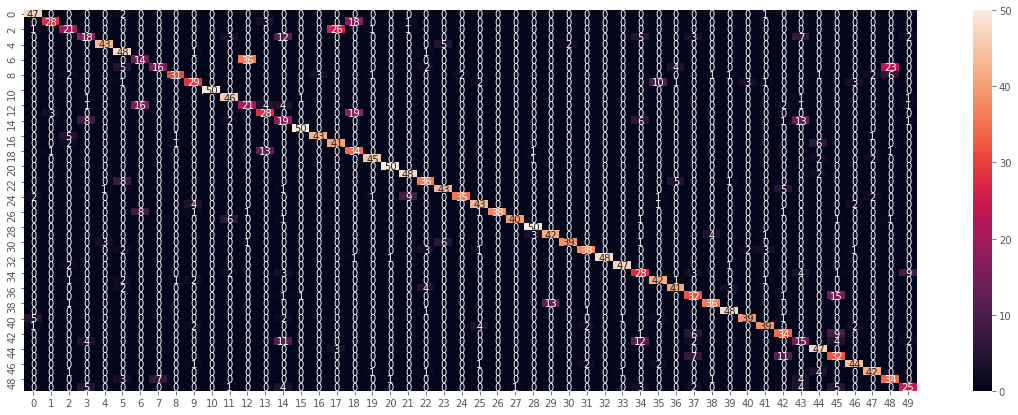

In [166]:
confusion_mat_lr = confusion_matrix(y_test, predictions_lr)
import seaborn as sns
sns.heatmap(confusion_mat_lr, annot=True)

<h2>Naive Bayes</h2>

Naive bayes assumes strong (naive) independence assumptions between the features. Hence, its not appropriate to apply it on SVD dataset. We will apply it only on TF-IDF vector

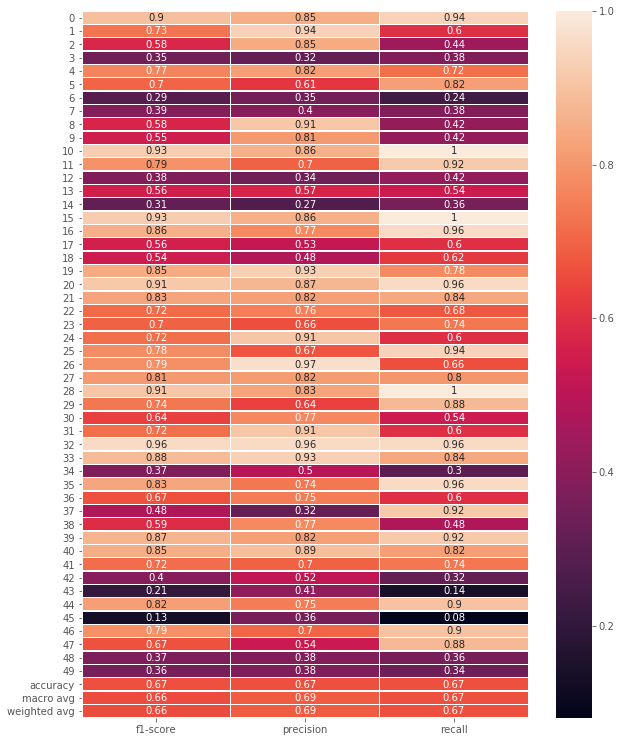

In [161]:
nby = MultinomialNB(alpha=1.0,fit_prior=True, class_prior=None)
nby.fit(train_matrix_tf_idf,y_train)
predictions_nbm=nby.predict(test_matrix_tf_idf)

class_report_dict_nb = classification_report(y_test, predictions_nbm,output_dict=True)
#acc_all_model.append({'Naive Bayes':np.round(class_report_dict_nb['accuracy']*100,2)})

insert_results(class_report_dict_nb,'Naive Bayes')
fig, ax = plt.subplots(figsize=(10,13))  
sns.heatmap(pd.DataFrame(class_report_dict_nb).iloc[:-1, :].T, annot=True, linewidths=.4, ax=ax)


<h2>Support Vector Machine</h2>

In [128]:
#from sklearn.svm import SVC
#param_grid = {'C': [0.1, 1, 10, 100, 1000],
#              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#              'kernel': ['linear','sigmoid']}
#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
#grid.fit(train_matrix_tf_idf, y_train)
#print('Config: %s' % grid.best_params_)

In [129]:




svm = svm.SVC(probability=True, kernel="sigmoid",gamma=1,C=100)
for i in range(2):
    X_train = X_train_vectorizors[i]
    X_test = X_test_vectorizors[i]
    
    svm.fit(X_train,y_train)
    prediction_svm = svm.predict(X_test)
    print(classification_report(y_test, prediction_svm))
    class_report_dict_svm = classification_report(y_test, prediction_svm,output_dict=True)
    insert_results(class_report_dict_svm,'SVM + '+X_labels[i])


              precision    recall  f1-score   support

           0       0.84      0.92      0.88        50
           1       0.88      0.60      0.71        50
           2       0.47      0.40      0.43        50
           3       0.63      0.34      0.44        50
           4       0.89      0.84      0.87        50
           5       0.54      0.94      0.69        50
           6       0.48      0.28      0.35        50
           7       0.71      0.30      0.42        50
           8       0.85      0.66      0.74        50
           9       0.67      0.60      0.63        50
          10       1.00      0.96      0.98        50
          11       0.79      0.92      0.85        50
          12       0.37      0.42      0.39        50
          13       0.53      0.46      0.49        50
          14       0.33      0.36      0.34        50
          15       0.98      1.00      0.99        50
          16       0.95      0.78      0.86        50
          17       0.55    

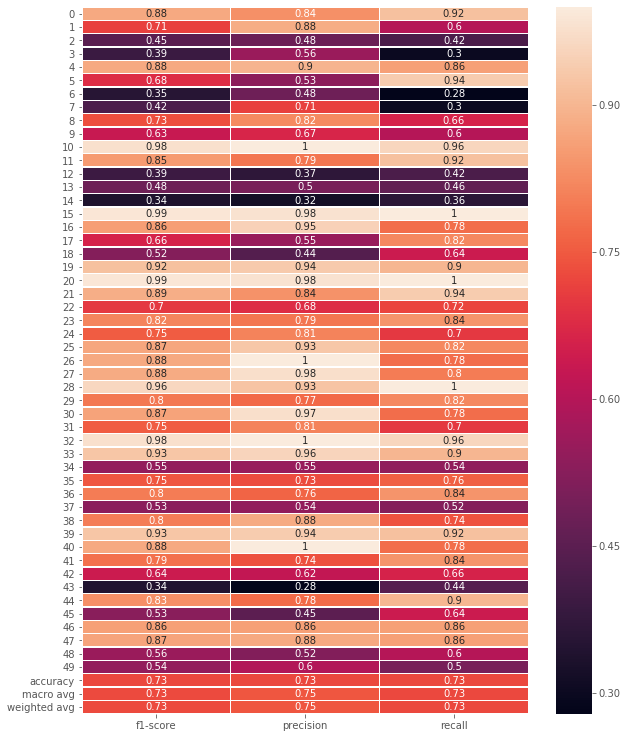

In [130]:



fig, ax = plt.subplots(figsize=(10,13))  
sns.heatmap(pd.DataFrame(class_report_dict_svm).iloc[:-1, :].T, annot=True, linewidths=.4, ax=ax)


<h2>Ensemble Learning</h2>

<h3>Random Forest</h3>

We will perform random forest only with TF-IDF as random forest running infinitly with SVD

In [131]:
clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42,max_features=2000)
for i in range(1):
    X_train = X_train_vectorizors[i]
    X_test = X_test_vectorizors[i]
    clf.fit(X_train,y_train)
    prediction_rand = clf.predict(X_test)
    print(classification_report(y_test, prediction_rand))
    class_report_dict_rand = classification_report(y_test, prediction_rand,output_dict=True)
    insert_results(class_report_dict_rand,'Random Forest '+X_labels[i])

              precision    recall  f1-score   support

           0       0.65      0.88      0.75        50
           1       0.92      0.68      0.78        50
           2       0.65      0.30      0.41        50
           3       0.61      0.40      0.48        50
           4       0.90      0.52      0.66        50
           5       0.59      0.72      0.65        50
           6       0.23      0.28      0.25        50
           7       0.62      0.20      0.30        50
           8       0.59      0.32      0.42        50
           9       0.44      0.30      0.36        50
          10       0.85      1.00      0.92        50
          11       0.69      0.98      0.81        50
          12       0.32      0.36      0.34        50
          13       0.61      0.54      0.57        50
          14       0.42      0.36      0.39        50
          15       1.00      0.96      0.98        50
          16       0.80      0.86      0.83        50
          17       0.40    

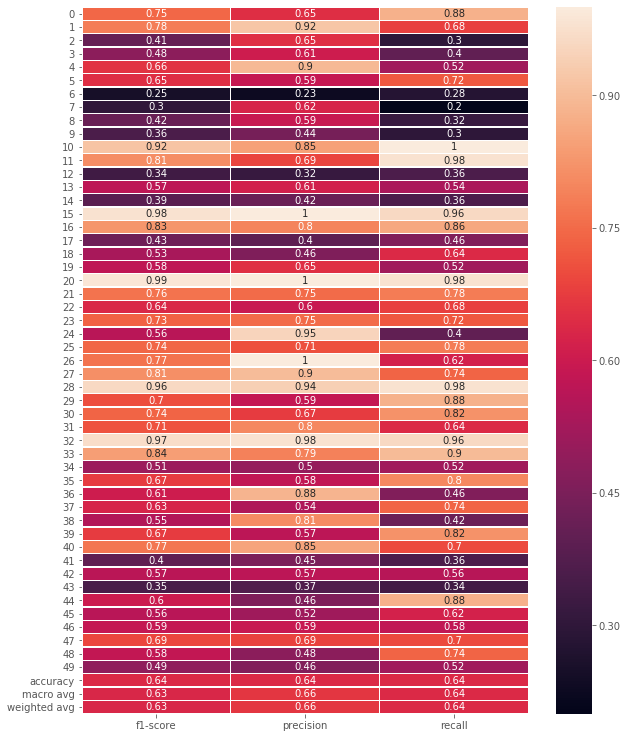

In [132]:
fig, ax = plt.subplots(figsize=(10,13))  
sns.heatmap(pd.DataFrame(class_report_dict_rand).iloc[:-1, :].T, annot=True, linewidths=.4, ax=ax)


<h3>Bagging Classifier</h3>

In [133]:
from sklearn.ensemble import BaggingClassifier
# Initialize weak model
base_model = LogisticRegression(C=1000,max_iter=100, penalty='l2', solver='newton-cg')
# Create bagging classifier
clf_bagging = BaggingClassifier(base_estimator=base_model, n_estimators=50,n_jobs=3)
clf_bagging.fit(train_matrix_tf_idf, y_train)
prediction_bag = clf.predict(test_matrix_tf_idf)
# Check oob score
print(classification_report(y_test, prediction_bag))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75        50
           1       0.92      0.68      0.78        50
           2       0.65      0.30      0.41        50
           3       0.61      0.40      0.48        50
           4       0.90      0.52      0.66        50
           5       0.59      0.72      0.65        50
           6       0.23      0.28      0.25        50
           7       0.62      0.20      0.30        50
           8       0.59      0.32      0.42        50
           9       0.44      0.30      0.36        50
          10       0.85      1.00      0.92        50
          11       0.69      0.98      0.81        50
          12       0.32      0.36      0.34        50
          13       0.61      0.54      0.57        50
          14       0.42      0.36      0.39        50
          15       1.00      0.96      0.98        50
          16       0.80      0.86      0.83        50
          17       0.40    

In [134]:
class_report_dict_bag = classification_report(y_test, prediction_bag,output_dict=True)
insert_results(class_report_dict_bag,'Bagging')

<h3>AdaBoost</h3>

In [135]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize weak model
base_model =  LogisticRegression(C=1000,max_iter=100, penalty='l2', solver='newton-cg')
# Create AdaBoost regressor
reg_adaboost = AdaBoostClassifier(base_estimator=base_model, n_estimators=100,random_state=42)
reg_adaboost.fit(train_matrix_tf_idf, y_train)
# Predict and compare with y_test
pred = reg_adaboost.predict(test_matrix_tf_idf)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87        50
           1       0.96      0.54      0.69        50
           2       0.34      0.40      0.37        50
           3       0.81      0.26      0.39        50
           4       0.89      0.84      0.87        50
           5       0.41      0.96      0.57        50
           6       0.56      0.28      0.37        50
           7       1.00      0.02      0.04        50
           8       0.70      0.66      0.68        50
           9       0.60      0.54      0.57        50
          10       1.00      0.86      0.92        50
          11       0.84      0.86      0.85        50
          12       0.37      0.42      0.39        50
          13       0.62      0.62      0.62        50
          14       0.37      0.32      0.34        50
          15       1.00      0.98      0.99        50
          16       0.94      0.62      0.75        50
          17       0.51    

In [136]:
class_report_dict_ada = classification_report(y_test, pred,output_dict=True)
insert_results(class_report_dict_ada,'AdaBoost')

<h2>Results</h2>

In [137]:
df_results=pd.concat([pd.DataFrame(l) for l in results_list],axis=1)
df_results

,KNN,Logistic Regression + TF-IDF,Logistic Regression + SVD,Naive Bayes,SVM + TF-IDF,SVM + SVD,Random Forest TF-IDF,Bagging,AdaBoost
Accuracy,61.60,73.96,73.88,66.52,72.56,72.60,63.84,63.84,68.52
F1 score,60.66,73.83,73.74,65.52,72.68,72.72,63.21,63.21,68.40
Precision,62.70,75.26,75.14,68.50,74.54,74.58,66.28,66.28,74.51


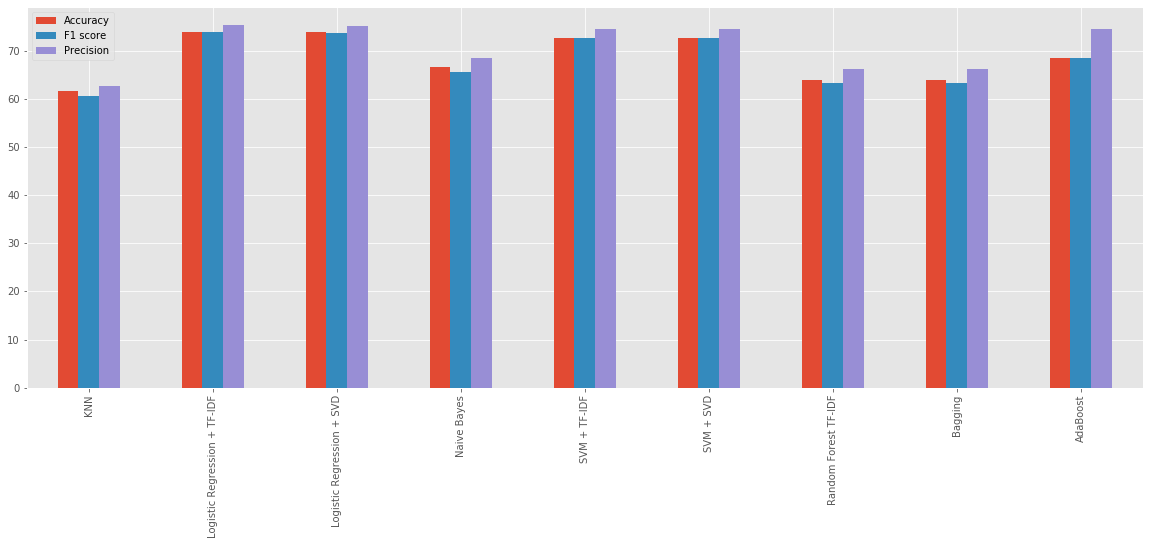

In [138]:
plt.rcParams["figure.figsize"] = (20,7)
df_results.T.plot.bar() 

<h2>Stylometric and Geographic features</h2>

In [139]:
df_train_features = pd.read_csv('train_profiles_df.csv')
df_test_features = pd.read_csv('test_profiles_df.csv')
df_geography=pd.read_csv('geography.csv')

In [140]:
import nltk
nltk.download('cmudict')
import numpy as np
import scipy as sc
import collections
from collections import Counter
from nltk.corpus import cmudict
import math
cmudict = cmudict.dict()
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize

def avg_sentence_length_word(sentences):
    return np.mean([len(sentence.split()) for sentence in sentences])

def n_syllables_except(token):
    vowels = 'aeiouy'
    count = 0
    if token[0] in vowels:
        count += 1
    for index in range(1, len(token)):
        if token[index] in vowels and token[index-1] not in vowels:
            count += 1
            if token[-1] == 'e':
                count -= 1
    if count == 0:
        count += 1
    return count

def n_syllables(token):
    try:
        n = [len(list(y for y in x if y[-1].isdigit())) for x in cmudict[token]][0]
    except:
        n = n_syllables_except(token) 
    return n



def punctuation_sentence(sentences):
    count = 0
    for sentence in sentences:
        for char in sentence:
            if char in string.punctuation:
                count += 1
    return float(count) / float(len(sentences))

def dots_sentence(sentences):
    count = 0
    for sentence in sentences:
        for char in sentence:
            if char in '\.':
                count += 1
    return float(count) / float(len(sentences))

def simpsons_d(tokens):
    token_freq = collections.Counter()
    token_freq.update(tokens)
    N = len(tokens)
    n = sum([1.0 * i * (i - 1) for i in token_freq.values()])
    D = 1 - (n / (N * (N - 1)))
    return D

def average_nps(doc, window_size=1000):    
    counts = []
    for i in range(int(len(doc) / window_size)):  # ignore last partial chunk
        count = 0
        for chunk in (doc[i * window_size:(i * window_size) + window_size]).noun_chunks:
            count += 1
        counts.append(count)
    return np.mean(counts)

def RemoveSpecialCHs(text):
    text = word_tokenize(text)
    st = [",", ".", "'", "!", '"', "#", "$", "%", "&", "(", ")", "*", "+", "-", ".", "/", ":", ";", "<", "=", '>', "?",
          "@", "[", "\\", "]", "^", "_", '`', "{", "|", "}", '~', '\t', '\n']

    words = [word for word in text if word not in st]
    return words

def YulesCharacteristicK(text):
    words = RemoveSpecialCHs(text)
    N = len(words)
    freqs = collections.Counter()
    freqs.update(words)
    vi = collections.Counter()
    vi.update(freqs.values())
    M = sum([(value * value) * vi[value] for key, value in freqs.items()])
    K = 10000 * (M - N) / math.pow(N, 2)
    return K

def AvgWordFrequencyClass(text):
    words = RemoveSpecialCHs(text)
    # dictionary comprehension . har word kay against value 0 kardi
    freqs = {key: 0 for key in words}
    for word in words:
        freqs[word] += 1
    maximum = float(max(list(freqs.values())))
    return np.average([math.floor(math.log((maximum + 1) / (freqs[word]) + 1, 2)) for word in words])

def BrunetsMeasureW(text):
    words = RemoveSpecialCHs(text)
    a = 0.17
    V = float(len(set(words)))
    N = len(words)
    B = (V - a) / (math.log(N))
    return B

def ShannonEntropy(text):
    words = RemoveSpecialCHs(text)
    lenght = len(words)
    freqs = collections.Counter()
    freqs.update(words)
    arr = np.array(list(freqs.values()))
    distribution = 1. * arr
    distribution /= max(1, lenght)
    import scipy as sc
    H = sc.stats.entropy(distribution, base=2)
    # H = sum([(i/lenght)*math.log(i/lenght,math.e) for i in freqs.values()])
    return H

def CountSpecialCharacter(text):
    st = ["#", "$", "%", "&", "(", ")", "*", "+", "-", "/", "<", "=", '>',
          "@", "[", "\\", "]", "^", "_", '`', "{", "|", "}", '~', '\t', '\n']
    count = 0
    for i in text:
        if (i in st):
            count = count + 1
    return count / len(text)

def Countdots(text):
    st = ["."]
    count = 0
    for i in text:
        if (i in st):
            count = count + 1
    return count / len(text)

def Countcomma(text):
    st = [","]
    count = 0
    for i in text:
        if (i in st):
            count = count + 1
    return count / len(text)

def Countsemicolon(text):
    st = [";"]
    count = 0
    for i in text:
        if (i in st):
            count = count + 1
    return count / len(text)

[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [141]:
#from stylometry import *
df_geography.head()

,location
0,china
1,usa
2,new zealand
3,britain
4,british


Get the count of number of times each of the location mentioned in df_geography and add it into the features dataframe

In [142]:

df_train_features['avg_sentence_length_word']=df_train_features['text'].apply(lambda x: avg_sentence_length_word(str(x)))
df_test_features['avg_sentence_length_word']=df_test_features['text'].apply(lambda x: avg_sentence_length_word(str(x)))

df_train_features['n_syllables_except']=df_train_features['text'].apply(lambda x: n_syllables_except(str(x).split()))
df_test_features['n_syllables_except']=df_test_features['text'].apply(lambda x: n_syllables_except(str(x).split()))

df_train_features['n_syllables']=df_train_features['text'].apply(lambda x: n_syllables(str(x).split()))
df_test_features['n_syllables']=df_test_features['text'].apply(lambda x: n_syllables(str(x).split()))

df_train_features['punctuation_sentence']=df_train_features['text'].apply(lambda x: punctuation_sentence(str(x)))
df_test_features['punctuation_sentence']=df_test_features['text'].apply(lambda x: punctuation_sentence(str(x).split()))

df_train_features['simpsons_d']=df_train_features['text'].apply(lambda x: simpsons_d(str(x).split()))
df_test_features['simpsons_d']=df_test_features['text'].apply(lambda x: simpsons_d(str(x).split()))

df_train_features['YulesCharacteristicK']=df_train_features['text'].apply(lambda x: YulesCharacteristicK(str(x)))
df_test_features['YulesCharacteristicK']=df_test_features['text'].apply(lambda x: YulesCharacteristicK(str(x)))

df_train_features['AvgWordFrequencyClass']=df_train_features['text'].apply(lambda x: AvgWordFrequencyClass(str(x)))
df_test_features['AvgWordFrequencyClass']=df_test_features['text'].apply(lambda x: AvgWordFrequencyClass(str(x)))

df_train_features['BrunetsMeasureW']=df_train_features['text'].apply(lambda x: BrunetsMeasureW(str(x)))
df_test_features['BrunetsMeasureW']=df_test_features['text'].apply(lambda x: BrunetsMeasureW(str(x)))

df_train_features['ShannonEntropy']=df_train_features['text'].apply(lambda x: ShannonEntropy(str(x)))
df_test_features['ShannonEntropy']=df_test_features['text'].apply(lambda x: ShannonEntropy(str(x)))

df_train_features['CountSpecialCharacter']=df_train_features['text'].apply(lambda x: CountSpecialCharacter(str(x).split()))
df_test_features['CountSpecialCharacter']=df_test_features['text'].apply(lambda x: CountSpecialCharacter(str(x).split()))

df_train_features['numerics'] = df_train_features['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df_test_features['numerics'] = df_test_features['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))


#df_train_features["dots_count"]=df_train_features["text"].apply(lambda x: Countdots(str(x).split()))
#df_train_features["dots_count"]=df_test_features["text"].apply(lambda x: Countdots(str(x).split()))

#df_train_features["comma_count"]=df_train_features["text"].apply(lambda x: Countcomma(str(x).split()))
#df_train_features["comma_count"]=df_test_features["text"].apply(lambda x: Countcomma(str(x).split()))

#df_train_features["semicolon_count"]=df_train_features["text"].apply(lambda x: Countsemicolon(str(x).split()))
#df_train_features["semicolon_count"]=df_test_features["text"].apply(lambda x: Countsemicolon(str(x).split()))



In [143]:
df_train_features.head()

,text,sentences_count,characters_count,repeated_letters_count,spaces_count,chars_excl_spaces_count,repeated_spaces_count,whitespaces_count,chars_excl_whitespaces_count,repeated_whitespaces_count,...,n_syllables_except,n_syllables,punctuation_sentence,simpsons_d,YulesCharacteristicK,AvgWordFrequencyClass,BrunetsMeasureW,ShannonEntropy,CountSpecialCharacter,numerics
0,The Internet may be overflowing with new techn...,6,1989,1,308,1681,0,309,1680,0,...,9,9,0.024133,0.992776,2904.157272,2.959119,35.201005,7.251711,0.0,0
1,The U.S. Postal Service announced Wednesday a ...,13,2586,0,409,2177,4,415,2171,4,...,10,10,0.019722,0.991564,2177.062510,2.900474,39.177798,7.327783,0.0,0
2,Elementary school students with access to the ...,1,487,0,70,417,0,70,417,0,...,1,1,0.014374,0.991952,4795.471147,1.675676,13.668474,5.729592,0.0,1
3,An influential Internet organisation has backe...,5,2875,0,447,2428,0,447,2428,0,...,8,8,0.018783,0.991141,2409.016502,2.980728,43.901000,7.455716,0.0,1
4,An influential Internet organisation has backe...,4,2275,0,343,1932,0,344,1931,0,...,7,7,0.018901,0.986973,2464.288763,3.596100,35.665222,7.087904,0.0,1


In [144]:
for index,row in df_geography.iterrows():
    #print(row.loc['location'])
    df_train_features[row.loc['location']]=df_trainset["preprocessed_text"].apply(lambda x: (str(x)).count(row.loc['location']))
    df_test_features[row.loc['location']]=df_testset["preprocessed_text"].apply(lambda x: (str(x)).count(row.loc['location']))

toptopics.csv contains the top topics derived by applying LDA on the unigram and bigrams of the preprocessed text. The processing of LDA was done in google colab since it was resouce intensive; and its reults were stored in the .csv file. The file is loaded here to be part of the training set.

In [145]:
df_toptopics=pd.read_csv('toptopics.csv')
for index,row in df_toptopics.iterrows():
    #print(row.loc['location'])
    df_train_features[row.loc['topic']]=df_trainset["preprocessed_text"].apply(lambda x: (str(x)).count(row.loc['topic']))
    df_test_features[row.loc['topic']]=df_testset["preprocessed_text"].apply(lambda x: (str(x)).count(row.loc['topic']))

In [146]:
df_test_features.head()

,text,sentences_count,characters_count,repeated_letters_count,spaces_count,chars_excl_spaces_count,repeated_spaces_count,whitespaces_count,chars_excl_whitespaces_count,repeated_whitespaces_count,...,dan,former student,demonstration,counter revolutionary,parole,year old,subversion,defend,face,wei
0,U.S. Senators on Tuesday sharply criticized a ...,17,3778,0,589,3189,6,598,3180,6,...,1,0,0,0,0,0,0,1,0,0
1,Two members of Congress criticised the Federal...,6,2140,0,336,1804,0,340,1800,0,...,0,0,0,0,0,0,0,0,0,0
2,Commuters stuck in traffic on the Leesburg Pik...,18,6345,0,1014,5331,0,1019,5326,0,...,0,0,0,0,0,0,0,0,0,0
3,A broad coalition of corporations went to Capi...,4,2201,0,316,1885,0,318,1883,0,...,0,0,0,0,0,0,0,0,0,0
4,"On the Internet, where new products come and g...",18,4197,4,672,3525,0,675,3522,0,...,0,0,0,0,0,0,0,0,0,2


Convert categorical columns to hold numerical values

In [147]:
df_train_features=pd.get_dummies(df_train_features, columns=['sentiment_polarity', 'sentiment_polarity_summarised', 'sentiment_subjectivity', 'sentiment_subjectivity_summarised','spelling_quality','spelling_quality_summarised'])
df_test_features=pd.get_dummies(df_test_features, columns=['sentiment_polarity', 'sentiment_polarity_summarised', 'sentiment_subjectivity', 'sentiment_subjectivity_summarised','spelling_quality','spelling_quality_summarised'])

In [148]:
df_train_features.drop('ease_of_reading_quality', axis=1, inplace=True)
df_train_features.drop('ease_of_reading_summarised', axis=1, inplace=True)
df_test_features.drop('ease_of_reading_quality', axis=1, inplace=True)
df_test_features.drop('ease_of_reading_summarised', axis=1, inplace=True)
df_test_features.drop('spelling_quality_Quite good', axis=1, inplace=True)

In [149]:
df_test_features.drop('text', axis=1, inplace=True)
df_train_features.drop('text', axis=1, inplace=True)

In [150]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_std_train = pd.DataFrame(std_scaler.fit_transform(df_train_features), columns=df_train_features.columns)
df_std_test = pd.DataFrame(std_scaler.fit_transform(df_test_features), columns=df_test_features.columns)

In [151]:
df_std_train.head()

,sentences_count,characters_count,repeated_letters_count,spaces_count,chars_excl_spaces_count,repeated_spaces_count,whitespaces_count,chars_excl_whitespaces_count,repeated_whitespaces_count,count_words,...,sentiment_subjectivity_Pretty subjective,sentiment_subjectivity_Quite objective,sentiment_subjectivity_summarised_Objective,sentiment_subjectivity_summarised_Objective/subjective,sentiment_subjectivity_summarised_Subjective,spelling_quality_Bad,spelling_quality_Good,spelling_quality_Pretty good,spelling_quality_summarised_Bad,spelling_quality_summarised_Good
0,-0.303621,-1.289999,4.421990,-1.355572,-1.274996,-0.284886,-1.357138,-1.273744,-0.271446,-1.307004,...,-0.028296,-0.028296,-1.160783,1.162684,-0.028296,-1.092237,-0.080257,1.106435,-1.092237,1.092237
1,1.399381,-0.563246,-0.168946,-0.588945,-0.557254,0.752571,-0.559429,-0.562526,0.648710,-0.571781,...,-0.028296,-0.028296,-1.160783,1.162684,-0.028296,-1.092237,-0.080257,1.106435,-1.092237,1.092237
2,-1.520051,-3.118446,-0.168946,-3.162077,-3.104080,-0.284886,-3.155746,-3.103211,-0.271446,-3.111642,...,-0.028296,-0.028296,-1.160783,1.162684,-0.028296,-1.092237,-0.080257,1.106435,-1.092237,1.092237
3,-0.546907,-0.211434,-0.168946,-0.300511,-0.194042,-0.284886,-0.318611,-0.190259,-0.271446,-0.230162,...,-0.028296,-0.028296,0.861487,-0.860079,-0.028296,-1.092237,-0.080257,1.106435,-1.092237,1.092237
4,-0.790193,-0.941839,-0.168946,-1.089909,-0.911784,-0.284886,-1.093743,-0.910168,-0.271446,-1.032224,...,-0.028296,-0.028296,0.861487,-0.860079,-0.028296,-1.092237,-0.080257,1.106435,-1.092237,1.092237


In [167]:
X_train=df_std_train.to_numpy()
X_test=df_std_test.to_numpy()
y_train = df_trainset['author_label']
y_test = df_testset['author_label']

In [153]:
lr_stylo = LogisticRegression(C= 0.01, max_iter= 100, penalty='l2', solver= 'newton-cg')
lr_stylo.fit(X_train,y_train)
predictions_lr_stylo = lr_stylo.predict(X_test)
scores_lr_stylo = lr_stylo.fit(X_train,y_train).score(X_test,y_test)

print(classification_report(y_test, predictions_lr_stylo))
class_report_dict_stylo = classification_report(y_test, predictions_lr_stylo,output_dict=True)
insert_results(class_report_dict_stylo,'Logistic Reg + Stylometrics + LDA')
insert_results_stylo(class_report_dict_stylo,'Logistic Reg + Stylometrics + LDA')


              precision    recall  f1-score   support

           0       0.78      0.92      0.84        50
           1       0.93      0.56      0.70        50
           2       0.47      0.38      0.42        50
           3       0.42      0.30      0.35        50
           4       0.74      0.64      0.69        50
           5       0.57      0.82      0.67        50
           6       0.55      0.34      0.42        50
           7       0.49      0.44      0.46        50
           8       0.48      0.52      0.50        50
           9       0.56      0.46      0.51        50
          10       0.98      0.92      0.95        50
          11       0.72      0.86      0.78        50
          12       0.33      0.38      0.35        50
          13       0.63      0.68      0.65        50
          14       0.30      0.34      0.32        50
          15       0.93      1.00      0.96        50
          16       0.91      0.84      0.87        50
          17       0.47    

In [176]:
clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
clf.fit(X_train,y_train)
prediction_rand = clf.predict(X_test)
print(classification_report(y_test, prediction_rand))
class_report_dict_rand_sty = classification_report(y_test, prediction_rand,output_dict=True)
#insert_results(class_report_dict_rand,'Random Forest '+X_labels[i])
insert_results_stylo(class_report_dict_rand_sty,'Random Forest + Stylometrics + LDA')

              precision    recall  f1-score   support

           0       0.70      0.92      0.79        50
           1       0.88      0.56      0.68        50
           2       0.57      0.46      0.51        50
           3       0.30      0.34      0.32        50
           4       0.64      0.56      0.60        50
           5       0.60      0.72      0.65        50
           6       0.27      0.28      0.28        50
           7       0.55      0.24      0.33        50
           8       0.42      0.28      0.34        50
           9       0.37      0.20      0.26        50
          10       0.86      0.98      0.92        50
          11       0.71      0.92      0.80        50
          12       0.35      0.38      0.36        50
          13       0.61      0.46      0.52        50
          14       0.29      0.36      0.32        50
          15       0.94      0.98      0.96        50
          16       0.81      0.86      0.83        50
          17       0.46    

In [177]:
classifier = KNeighborsClassifier(n_neighbors=25,algorithm='auto',metric='cosine') #Using brute-force algorithm for quicker computation.
classifier.fit(X_train, y_train) #Fitting the built-in sklearn classifier on our training data
predicted_label_knn = classifier.predict(X_test) #Making the class
print(classification_report(y_test, predicted_label))
class_report_dict_knn_sty = classification_report(y_test, predicted_label_knn,output_dict=True)
insert_results_stylo(class_report_dict_knn_sty,'KNN + Stylometrics + LDA')


              precision    recall  f1-score   support

           0       0.70      0.84      0.76        50
           1       0.56      0.66      0.61        50
           2       0.61      0.34      0.44        50
           3       0.22      0.36      0.27        50
           4       0.35      0.36      0.35        50
           5       0.56      0.72      0.63        50
           6       0.25      0.12      0.16        50
           7       0.31      0.46      0.37        50
           8       0.40      0.46      0.43        50
           9       0.36      0.34      0.35        50
          10       0.67      0.94      0.78        50
          11       0.68      0.84      0.75        50
          12       0.32      0.38      0.35        50
          13       0.58      0.36      0.44        50
          14       0.19      0.20      0.19        50
          15       0.77      1.00      0.87        50
          16       0.76      0.88      0.81        50
          17       0.39    

In [178]:
from sklearn.preprocessing import MinMaxScaler
min_scaler = MinMaxScaler()
X_train_m = pd.DataFrame(min_scaler.fit_transform(df_train_features), columns=df_train_features.columns)
X_test_m = pd.DataFrame(min_scaler.fit_transform(df_test_features), columns=df_test_features.columns)
nby = MultinomialNB(alpha=1.0,fit_prior=True, class_prior=None)
nby.fit(X_train_m,y_train)
predictions_nbm_sty=nby.predict(X_test_m)
print(classification_report(y_test, predictions_nbm))
class_report_dict_nb_sty = classification_report(y_test, predictions_nbm_sty,output_dict=True)
insert_results_stylo(class_report_dict_nb_sty,'Naive bayes + Stylometrics + LDA')

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        50
           1       0.89      0.50      0.64        50
           2       0.39      0.54      0.45        50
           3       0.31      0.32      0.31        50
           4       0.65      0.56      0.60        50
           5       0.52      0.64      0.57        50
           6       0.63      0.24      0.35        50
           7       0.52      0.34      0.41        50
           8       0.59      0.34      0.43        50
           9       0.43      0.36      0.39        50
          10       0.75      0.88      0.81        50
          11       0.70      0.88      0.78        50
          12       0.32      0.36      0.34        50
          13       0.66      0.50      0.57        50
          14       0.24      0.38      0.29        50
          15       0.88      1.00      0.93        50
          16       0.79      0.90      0.84        50
          17       0.41    

In [154]:
#from sklearn.model_selection import GridSearchCV
#LR = LogisticRegression()
#LRparam_grid = {
#    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#    'penalty': ['l2'],
#    'max_iter': list(range(100,300,100)),
#    'solver': ['newton-cg', 'lbfgs']
#}
#LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)
#LR_search.fit(X_train , y_train)
#LR_search.best_params_
## summarize
#print('Mean Accuracy: %.3f' % LR_search.best_score_)
#print('Config: %s' % LR_search.best_params_)

<h3>Stylometric Results Comparision</h3>

In [179]:
df_results_stylo=pd.concat([pd.DataFrame(l) for l in results_list_stylo],axis=1)
df_results_stylo

,Logistic Reg + Stylometrics + LDA,Random Forest + Stylometrics + LDA,KNN + Stylometrics + LDA,Naive bayes + Stylometrics + LDA
Accuracy,66.76,61.32,54.24,57.60
F1 score,66.51,60.54,52.99,56.30
Precision,67.39,62.24,54.26,58.33


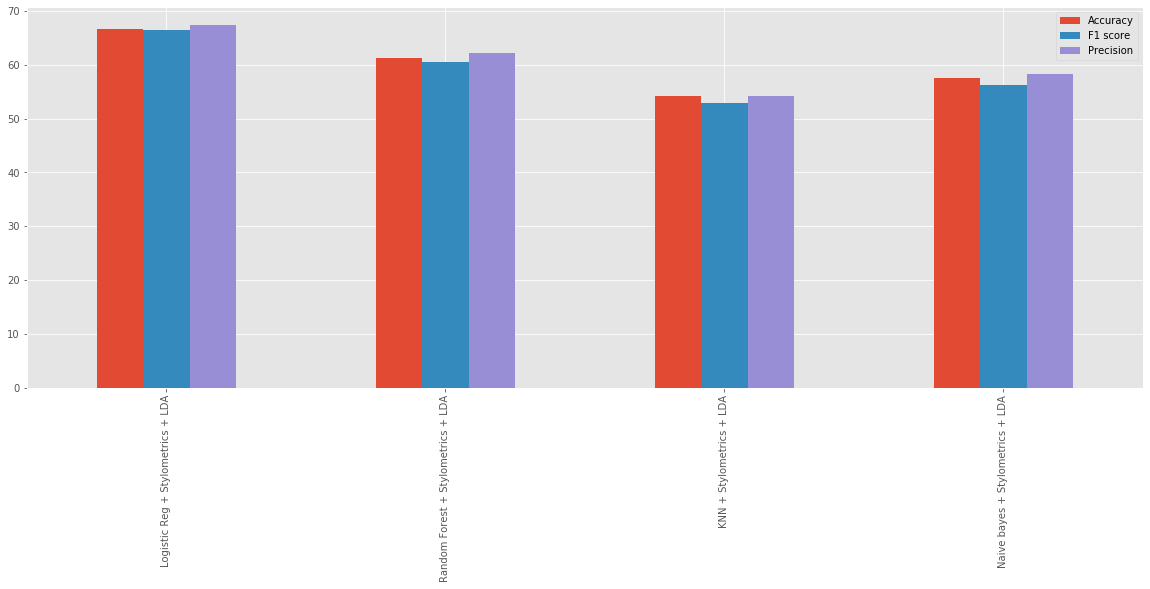

In [180]:
plt.rcParams["figure.figsize"] = (20,7)
df_results_stylo.T.plot.bar() 

<h2>Final Results</h2>

In [155]:
df_results=pd.concat([pd.DataFrame(l) for l in results_list],axis=1)
df_results

,KNN,Logistic Regression + TF-IDF,Logistic Regression + SVD,Naive Bayes,SVM + TF-IDF,SVM + SVD,Random Forest TF-IDF,Bagging,AdaBoost,Logistic Reg + Stylometrics + LDA
Accuracy,61.60,73.96,73.88,66.52,72.56,72.60,63.84,63.84,68.52,66.76
F1 score,60.66,73.83,73.74,65.52,72.68,72.72,63.21,63.21,68.40,66.51
Precision,62.70,75.26,75.14,68.50,74.54,74.58,66.28,66.28,74.51,67.39


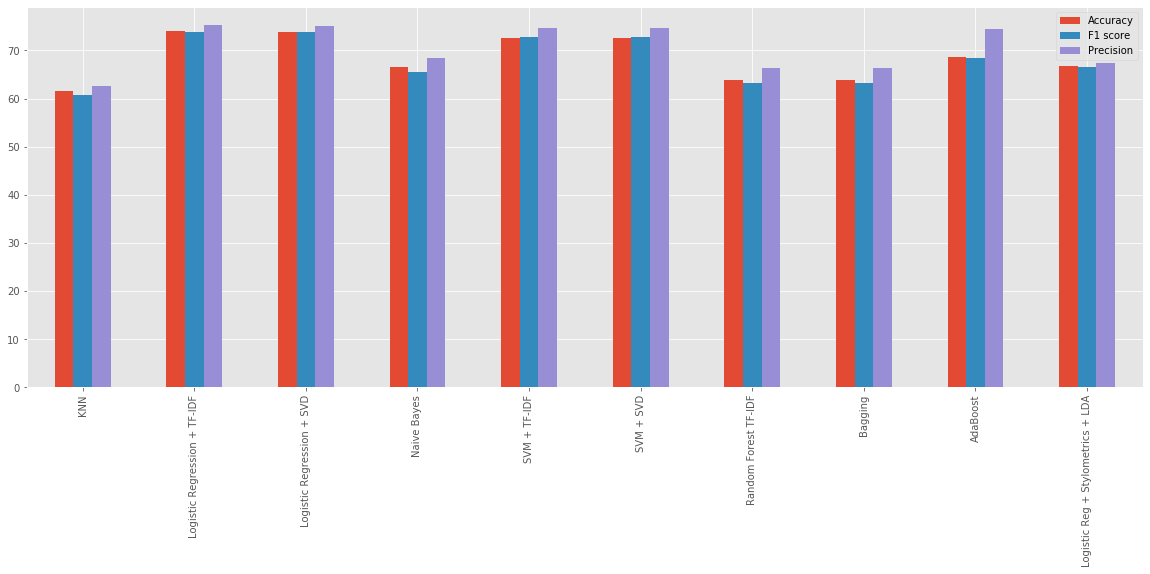

In [156]:
plt.rcParams["figure.figsize"] = (20,7)
df_results.T.plot.bar() 